# QPSK Demodulation Using LSTM Seq2Seq Autoencoder

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

import torch

import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [28]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=1, device='cpu', dropout=0):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=dropout)

    def forward(self, input, hidden):
        
        output, hidden = self.rnn(input, hidden)
        
        return output, hidden
    
    def initHidden(self, batch_size=32, device='cpu'):
        return (torch.zeros(self.num_layers, batch_size, self.hidden_size, device=device), 
                torch.zeros(self.num_layers, batch_size, self.hidden_size, device=device))

class EncoderConvRNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=1, device='cpu', num_filters=16, dropout=0):
        super(EncoderConvRNN, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True)
        
        self.conv1 = nn.Conv1d(2, num_filters, 9, padding=4)
        self.conv2 = nn.Conv1d(num_filters, 8, 9)
        self.maxpool = nn.MaxPool1d(2)

    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = x.permute(0,2,1)
#         x = x.permute(2,0,1)
        
        output, hidden = self.rnn(x)
        
        return output, hidden

In [122]:
rnn_encoder = EncoderRNN(input_size=2, hidden_size=128, num_layers=3)
conv_encoder = EncoderConvRNN(input_size=8, hidden_size=128, num_layers=3)
small_rnn_encoder = EncoderRNN(input_size=2, hidden_size=128, num_layers=2)

In [123]:
# Set the batch size and sequence length
batch_size = 32
seq_len = 50

# Create a random input tensor
input_tensor_rnn = torch.rand(seq_len, batch_size, 2)  # For rnn_encoder
input_tensor_conv = torch.rand(batch_size, 2, seq_len)  # For conv_encoder

# Initialize hidden state for the RNN encoder
hidden_rnn = rnn_encoder.initHidden(batch_size=batch_size)
small_hidden_rnn = small_rnn_encoder.initHidden(batch_size=batch_size)

In [112]:
%%timeit -o
output_rnn, _ = rnn_encoder(input_tensor_rnn, hidden_rnn)

26.5 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 26.5 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [113]:
result = _
rnn_time = result.average

In [114]:
%%timeit -o
output_conv, _ = conv_encoder(input_tensor_conv)

9.28 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 9.28 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [115]:
result = _
conv_time = result.average

In [116]:
%%timeit -o
output_rnn, _ = small_rnn_encoder(input_tensor_rnn, small_hidden_rnn)

17.5 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 17.5 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [117]:
result = _
small_rnn_time = result.average

In [124]:
# Set the batch size and sequence length
batch_size = 32
seq_len = 100

# Create a random input tensor
input_tensor_rnn = torch.rand(seq_len, batch_size, 2)  # For rnn_encoder
input_tensor_conv = torch.rand(batch_size, 2, seq_len)  # For conv_encoder

# Initialize hidden state for the RNN encoder
hidden_rnn = rnn_encoder.initHidden(batch_size=batch_size)
small_hidden_rnn = small_rnn_encoder.initHidden(batch_size=batch_size)

In [125]:
%%timeit -o
output_rnn, _ = rnn_encoder(input_tensor_rnn, hidden_rnn)

50.1 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 50.1 ms ± 5.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [126]:
result = _
rnn_time_100 = result.average

In [127]:
%%timeit -o
output_conv, _ = conv_encoder(input_tensor_conv)

25.1 ms ± 6.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 25.1 ms ± 6.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [128]:
result = _
conv_time_100 = result.average

In [129]:
%%timeit -o
output_rnn, _ = small_rnn_encoder(input_tensor_rnn, small_hidden_rnn)

34.3 ms ± 5.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 34.3 ms ± 5.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [130]:
result = _
small_rnn_time_100 = result.average

In [133]:
# Set the batch size and sequence length
batch_size = 32
seq_len = 200

# Create a random input tensor
input_tensor_rnn = torch.rand(seq_len, batch_size, 2)  # For rnn_encoder
input_tensor_conv = torch.rand(batch_size, 2, seq_len)  # For conv_encoder

# Initialize hidden state for the RNN encoder
hidden_rnn = rnn_encoder.initHidden(batch_size=batch_size)
small_hidden_rnn = small_rnn_encoder.initHidden(batch_size=batch_size)

In [134]:
%%timeit -o
output_rnn, _ = rnn_encoder(input_tensor_rnn, hidden_rnn)

106 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 106 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [135]:
result = _
rnn_time_200 = result.average

In [136]:
%%timeit -o
output_conv, _ = conv_encoder(input_tensor_conv)

45.8 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 45.8 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [137]:
result = _
conv_time_200 = result.average

In [138]:
%%timeit -o
output_rnn, _ = small_rnn_encoder(input_tensor_rnn, small_hidden_rnn)

68.9 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 68.9 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [139]:
result = _
small_rnn_time_200 = result.average

In [142]:
df_times = pd.DataFrame(index = ['2 Layer LSTM', '3 layer LSTM', 'Conv + 2 Layer LSTM'],
    data = {'50 samples' : [small_rnn_time, rnn_time, conv_time],
            '100 samples' : [small_rnn_time_100, rnn_time_100, conv_time_100],
            '200 samples' : [small_rnn_time_200, rnn_time_200, conv_time_200]})

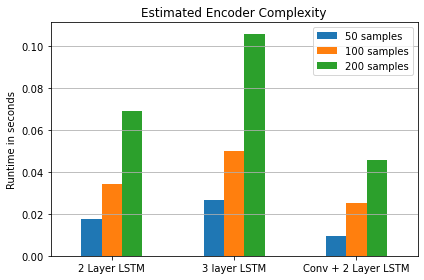

In [156]:
fig, ax = plt.subplots(1,1)#, figsize=(7,3))
df_times.plot(ax=ax, kind='bar', rot=0)
ax.set_title('Estimated Encoder Complexity')
ax.grid(axis='y')
ax.set_ylabel('Runtime in seconds')
plt.tight_layout()
# plt.savefig('figures/seq2seq_encoder_complexity.png', dpi=300, bbox_inches='tight')

In [33]:
from fvcore.nn import FlopCountAnalysis

In [48]:
flops = FlopCountAnalysis(conv_encoder, input_tensor_conv)

In [49]:
print(flops.total())

Unsupported operator aten::max_pool1d encountered 1 time(s)
Unsupported operator aten::lstm encountered 1 time(s)


811008


In [ ]:
# flops_per_timestep = 4 * (2 * (input_size * hidden_size + hidden_size))
flops_per_timestep = 4 * (2 * (input_size * hidden_size + hidden_size))

In [ ]:
layers * timesteps * 8 * 2 * hiddenSize * minibatch * (hiddenSize + 1)

In [52]:
1 * 1 * 8 * 2 * 128 * 1 + 129

2177

In [54]:
8 * 2 * 128 *2 + 128

4224

In [ ]:
(input + hidden) * hidden * 4 * 2

In [56]:
(2 + 128) * 128 * 8

133120

In [57]:
8 * 128

1024

In [ ]:
CCconv = (2 * (c * l * h)) * k * W * H

In [81]:
conv_flops = ((2 * (9 * 1 * 2)) * 16 * (50+8) * 2) + ((2 * (9 * 1 * 2)) * 16 * 25 * 2)

In [64]:
4 * 128 * 128 + 4 * 2 * 128

66560

In [74]:
input_sizes = [2, 128, 128]
hidden_size = 128
sequence_length = 50
layers = 3

flops = 0
for l in range(layers):
    flops += 8 * sequence_length * (input_sizes[l] * hidden_size + hidden_size**2 + hidden_size)

flops

33024000

In [78]:
input_sizes = [2, 128, 128]
hidden_size = 128
sequence_length = 50
layers = 2

flops = 0
for l in range(layers):
    flops += 8 * sequence_length * (input_sizes[l] * hidden_size + hidden_size**2 + hidden_size)

flops

19865600

In [80]:
flops/1024/1024

18.9453125

In [82]:
conv_flops/1024/1024

0.0911865234375